In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

import folium
from folium import plugins

In [10]:
denver_gpd = gpd.read_file('Data/Denver_crime_data/crime.shp')

C:\Users\User\anaconda3\envs\geopandas\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [4]:
df = pd.read_csv('Data/Denver_crime_data/crime.csv')
df[:5]

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,20206002576,20206002576230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/11/2020 10:00:00 PM,3/12/2020 7:00:00 AM,3/12/2020 9:47:00 AM,410 N ACOMA ST,3143822.0,1688642.0,-104.988703,39.723014,3.0,311.0,baker,1,0
1,20166006518,20166006518230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,7/6/2016 1:15:00 AM,7/6/2016 4:15:00 AM,7/6/2016 8:23:00 AM,5571 N HANNIBAL CT,3194359.0,1716094.0,-104.808304,39.797455,5.0,522.0,gateway-green-valley-ranch,1,0
2,2021174815,2021174815299900,2999,0,criminal-mischief-other,public-disorder,3/27/2021 12:20:00 AM,NaN,3/27/2021 8:59:00 PM,2101 MARKET ST,3142826.0,1700311.0,-104.992012,39.755063,6.0,612.0,five-points,1,0
3,2017139511,2017139511549900,5499,0,traf-other,all-other-crimes,3/1/2017 3:05:00 PM,NaN,3/1/2017 4:05:00 PM,12300 BLOCK E ALBROOK DR,3183998.0,1710284.0,-104.845325,39.781717,5.0,521.0,montbello,1,0
4,202138020,202138020220300,2203,0,burglary-business-by-force,burglary,1/19/2021 6:50:00 PM,1/19/2021 7:20:00 PM,1/19/2021 8:24:00 PM,2500 S COLORADO BLVD,3157863.0,1669614.0,-104.939205,39.670550,3.0,314.0,university-hills,1,0


In [12]:
df.isna().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      344836
REPORTED_DATE                  0
INCIDENT_ADDRESS           45601
GEO_X                       4585
GEO_Y                       4585
GEO_LON                     4586
GEO_LAT                     4586
DISTRICT_ID                    1
PRECINCT_ID                    1
NEIGHBORHOOD_ID                1
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

C:\Users\User\anaconda3\envs\geopandas\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of Missing Value')

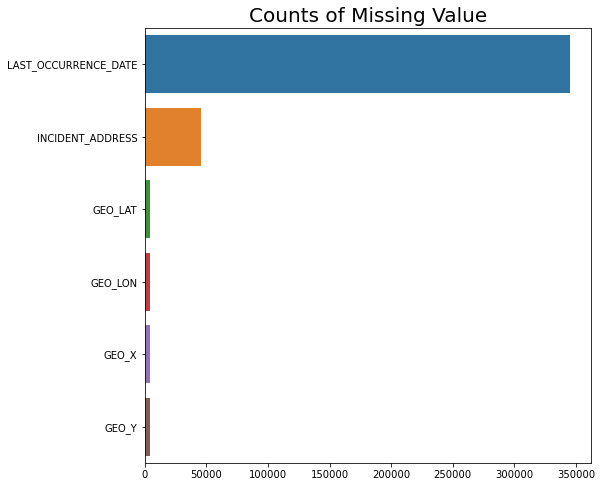

In [16]:
y = df.isnull().sum().sort_values(ascending = False)[:6].index
x = df.isnull().sum().sort_values(ascending = False)[:6]

plt.figure(figsize = (8, 8))
sns.barplot(x, y)
plt.title('Counts of Missing Value', size = 20)

In [17]:
df = df.dropna(subset = ['GEO_LAT', 'GEO_LON'])
df.isnull().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      342778
REPORTED_DATE                  0
INCIDENT_ADDRESS           41016
GEO_X                          0
GEO_Y                          0
GEO_LON                        0
GEO_LAT                        0
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [20]:
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531769 entries, 0 to 536354
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   INCIDENT_ID             531769 non-null  int64         
 1   OFFENSE_ID              531769 non-null  int64         
 2   OFFENSE_CODE            531769 non-null  int64         
 3   OFFENSE_CODE_EXTENSION  531769 non-null  int64         
 4   OFFENSE_TYPE_ID         531769 non-null  object        
 5   OFFENSE_CATEGORY_ID     531769 non-null  object        
 6   FIRST_OCCURRENCE_DATE   531769 non-null  object        
 7   LAST_OCCURRENCE_DATE    188991 non-null  object        
 8   REPORTED_DATE           531769 non-null  datetime64[ns]
 9   INCIDENT_ADDRESS        490753 non-null  object        
 10  GEO_X                   531769 non-null  float64       
 11  GEO_Y                   531769 non-null  float64       
 12  GEO_LON                 531769

In [24]:
df['REPORTED_DATE'].dayofweek

AttributeError: 'Series' object has no attribute 'dayofweek'

In [ ]:
df['REPORTED_DATE'] = df['REPORTED_DATE'].strftime('%Y-%m-%d')
